<a href="https://colab.research.google.com/github/torpedo-jamie/Financial-Inclusion-Zindi-Challenge/blob/master/Financial_Inclusion_Zindi_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")

# Loading train and test data

In [0]:
# importing train and test data from my google drive
train = pd.read_csv('/gdrive/My Drive/FinancialInclusionZindiChallenge/Train_v2.csv')
test = pd.read_csv('/gdrive/My Drive/FinancialInclusionZindiChallenge/Test_v2.csv')

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Fortunately, there are no missing values.

In [0]:
sns.set(style='whitegrid', palette='husl')

**Looking at the distribution of the country feature**

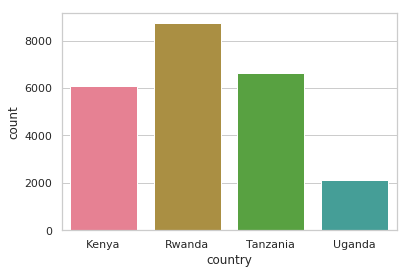

In [7]:
sns.countplot(train['country'])
plt.show()

We can observe that the country with the most records in the dataset is Rwanda. Uganda has the least amount of records in the dataset.

**Looking at the distribution of the year feature**

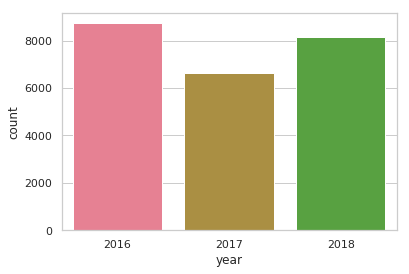

In [8]:
sns.countplot(train['year'])
plt.show()

There isn't a huge gap between the amount of records for the 3 years contained in the dataset.

**Looking at the distribution of the location type feature**

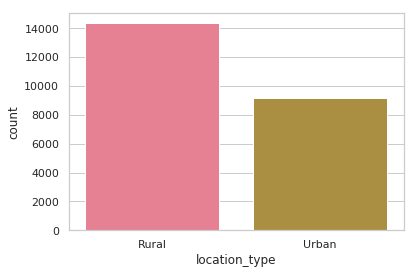

In [9]:
sns.countplot(train['location_type'])
plt.show()

We can observe that the dataset contains more data collected from individuals staying in rural areas than individuals staying in urban areas.

**Looking at the distribution of the cellphone access feature**

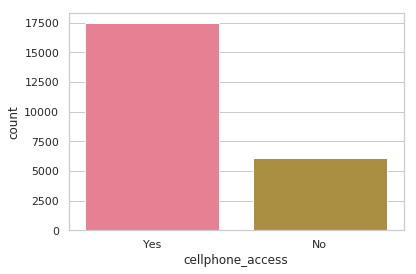

In [10]:
sns.countplot(train['cellphone_access'])
plt.show()

We can see that there are twice as many individuals saying they had cellphone access versus individuals who said they had no cellphone access.

**Looking at the distribution of the household size feature**

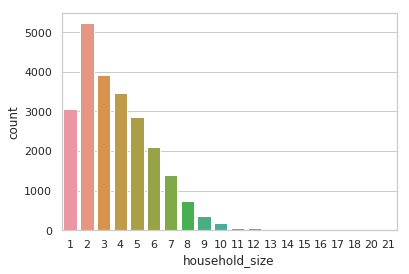

In [11]:
sns.countplot(train['household_size'])
plt.show()

We can see that most individuals come from households of sizes 2, 3, or 4 members.

**Looking at the distribution of the gender of respondent feature**

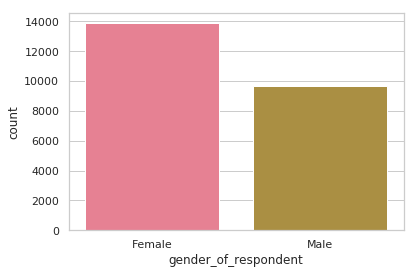

In [12]:
sns.countplot(train['gender_of_respondent'])
plt.show()

There were more females that answered the survey than males.

**Looking at the distribution of the relationship with head feature**

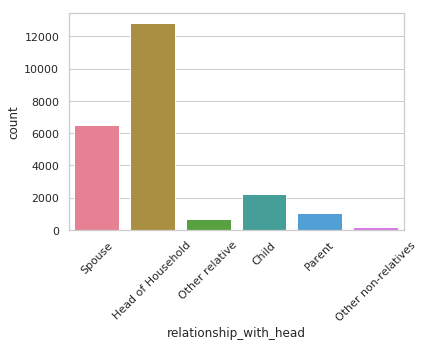

In [13]:
sns.countplot(train['relationship_with_head'])
plt.xticks(rotation=45)
plt.show()

The survey was answered mostly by the head of the household.

**Looking at the distribution of the marital status feature**

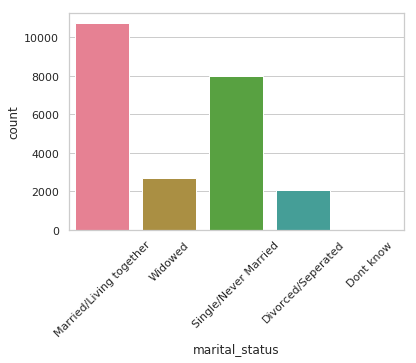

In [14]:
sns.countplot(train['marital_status'])
plt.xticks(rotation=45)
plt.show()

The survey was answered mostly married, living together and single people.

**Looking at the distribution of the education level feature**

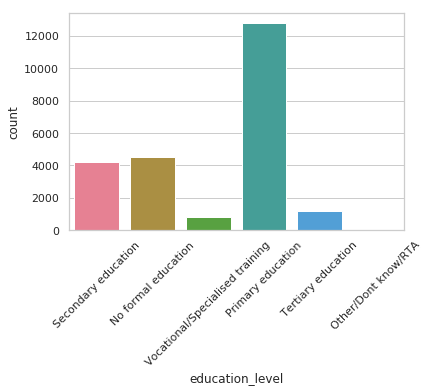

In [15]:
sns.countplot(train['education_level'])
plt.xticks(rotation=45)
plt.show()

The survey was mostly answered by individuals with only a primary education.

**Looking at the distribution of the job type feature**

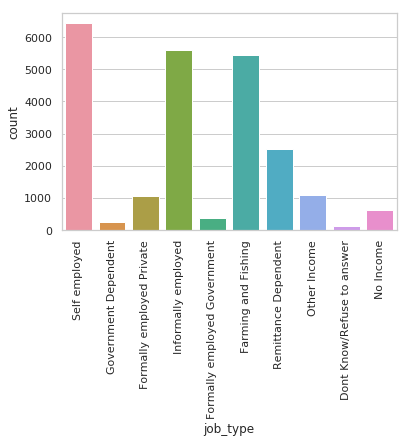

In [16]:
sns.countplot(train['job_type'])
plt.xticks(rotation=90)
plt.show()

The survey was answered mostly by self employed, informally employed, and individuals in the farming and fishing sector.


In [17]:
train['age_of_respondent'].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

In [18]:
train.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


We can observe that the only two numerical variables in the dataset, household size and age of respondent are negatively correlated.

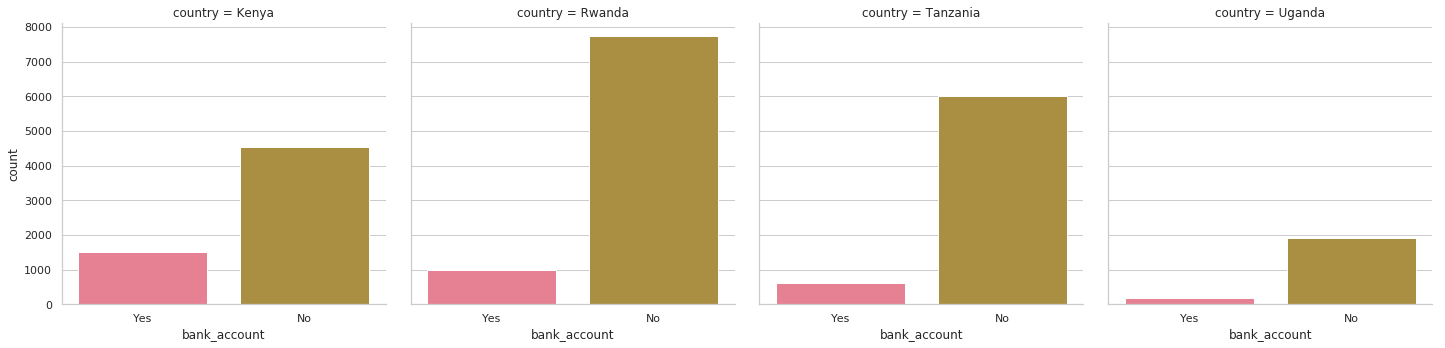

In [19]:
sns.catplot('bank_account', col='country', kind='count', data=train)

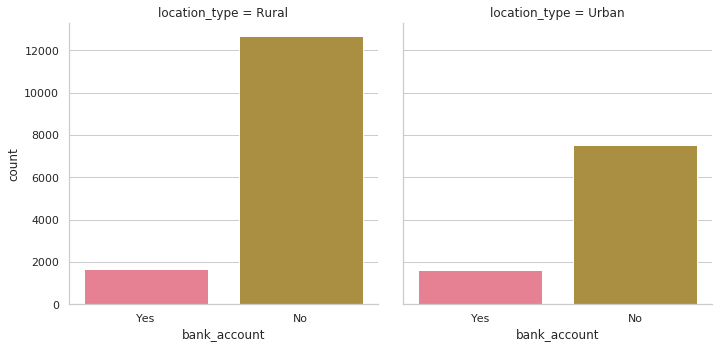

In [20]:
sns.catplot('bank_account', col='location_type', kind='count', data=train)

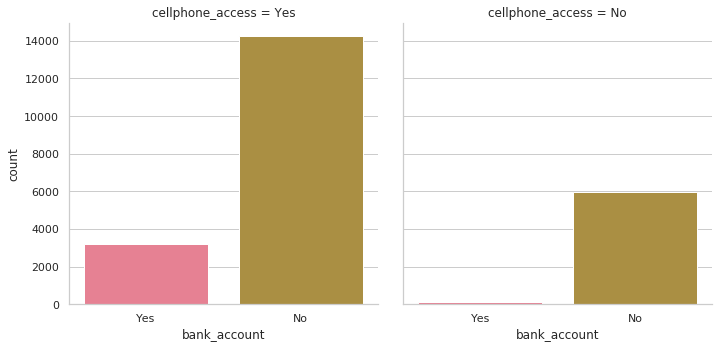

In [21]:
sns.catplot('bank_account', col='cellphone_access', kind='count', data=train)

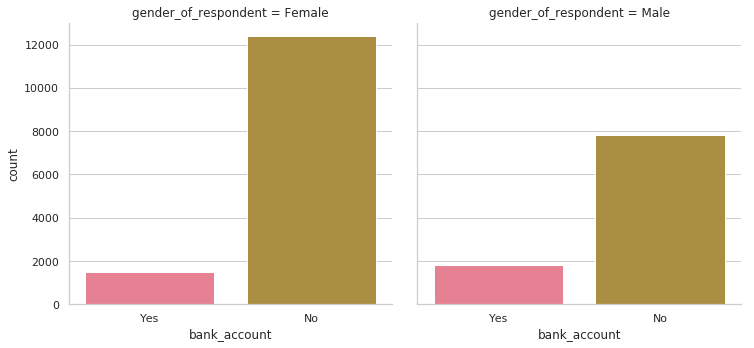

In [22]:
sns.catplot('bank_account', col='gender_of_respondent', kind='count', data=train, col_wrap=4)

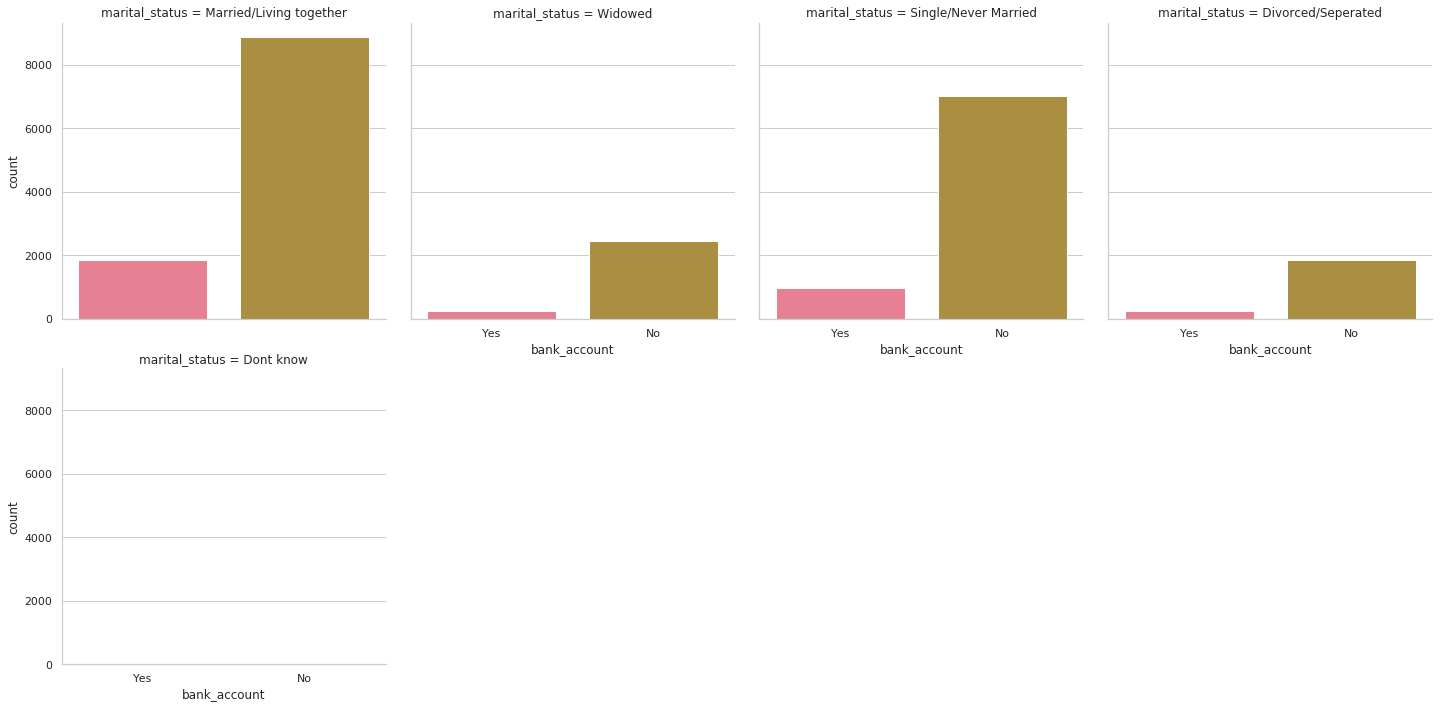

In [23]:
sns.catplot('bank_account', col='marital_status', kind='count', data=train, col_wrap=4)

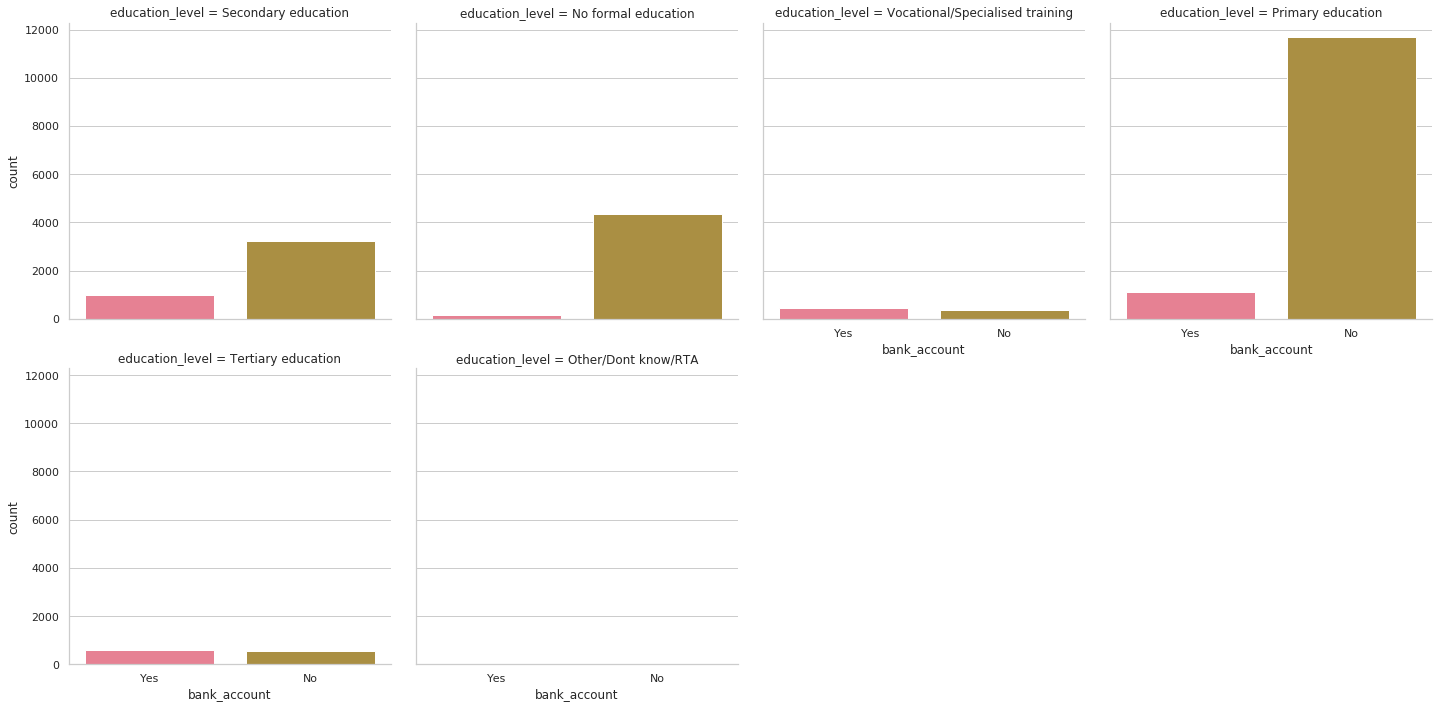

In [24]:
sns.catplot('bank_account', col='education_level', kind='count', data=train, col_wrap=4)

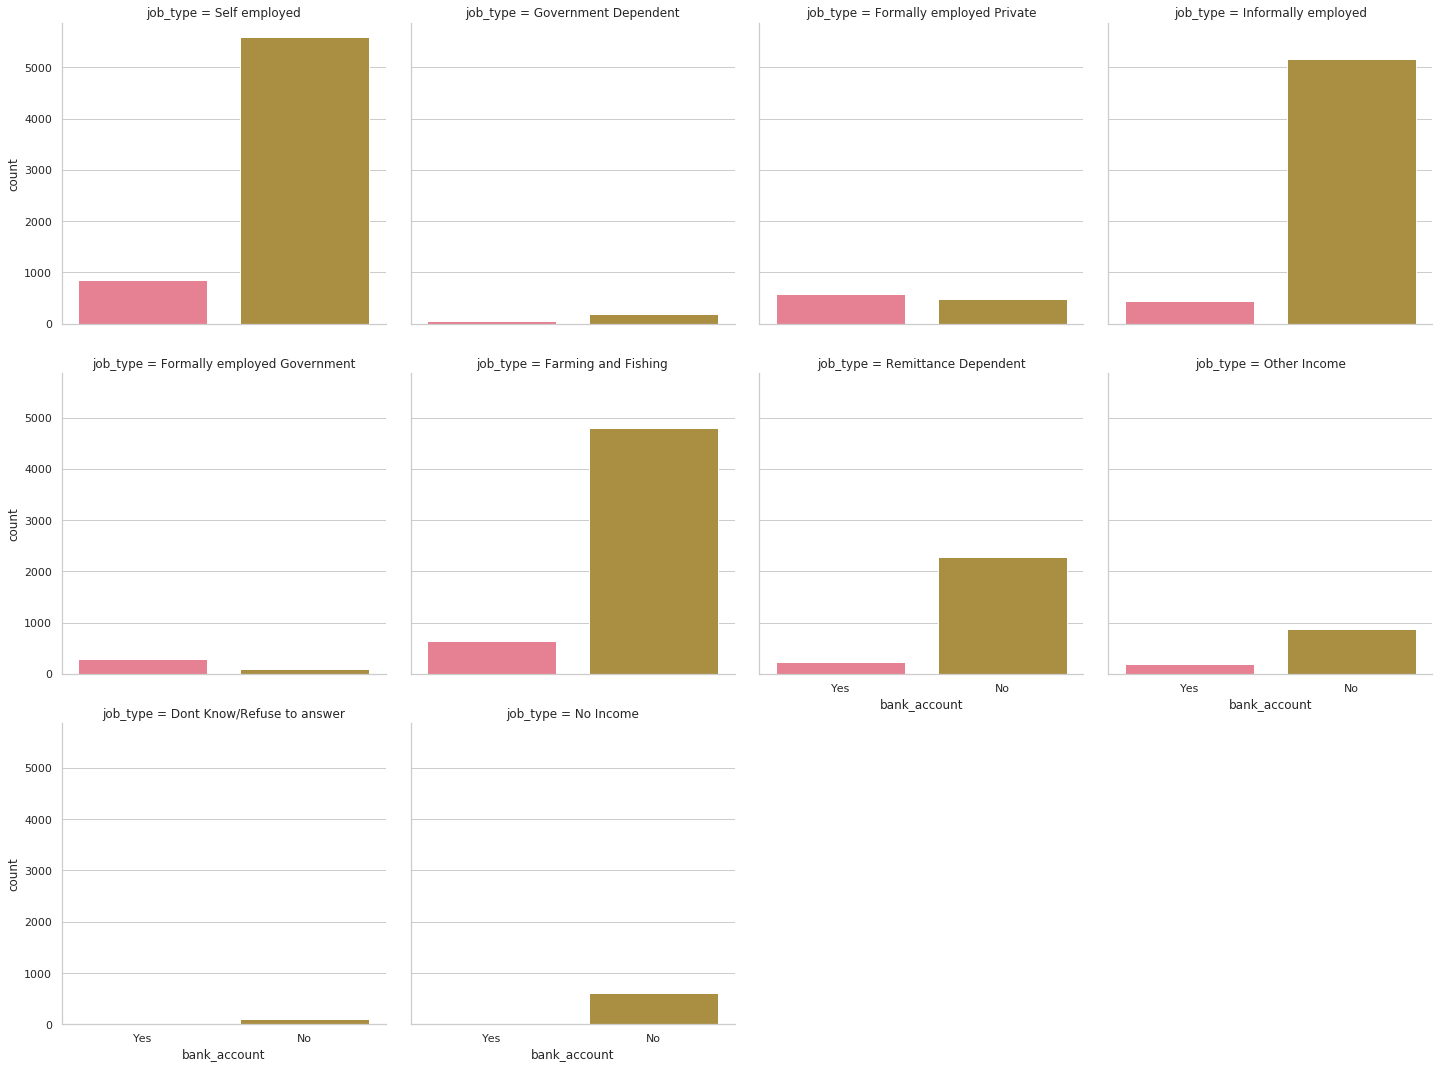

In [25]:
sns.catplot('bank_account', col='job_type', kind='count', data=train, col_wrap=4)

Looking at the distribution of the target variable, bank_account, we can observe that the data is unbalanced.

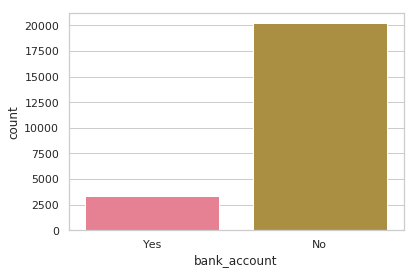

In [26]:
sns.countplot(train['bank_account'])
plt.show()

Encoding the target variable, bank account.

In [0]:
train['bank_account'] = train['bank_account'].apply(lambda x: 0 if x == 'No' else 1)

In [0]:
y = train['bank_account'].get_values()

Removing columns that are not necessary.

In [0]:
train = train.drop(['uniqueid', 'year', 'bank_account', 'household_size', 'relationship_with_head'], axis=1)

In [0]:
X = pd.get_dummies(train, drop_first=True)

Splitting the train data into train and test sets.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

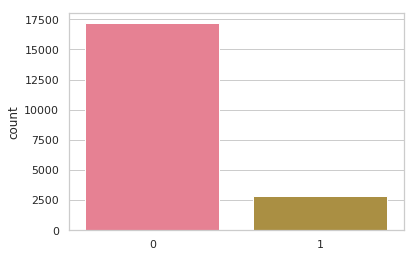

In [32]:
sns.countplot(y_train)

# Training logistic regression model

In [33]:
lm = LogisticRegression()
params = {'C': [0.001, 0.01, 0.1, 1.0],
          'solver': ['liblinear', 'sag', 'saga']}
clf_lm = GridSearchCV(estimator=lm, param_grid=params)
clf_lm.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                         'solver': ['liblinear', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
clf_lm.best_params_

{'C': 1.0, 'solver': 'liblinear'}

In [34]:
y_pred = clf_lm.predict(X_train)
accuracy_score(y_train, y_pred)

0.8855713928482121

In [35]:
y_pred = clf_lm.predict(X_test)
accuracy_score(y_test, y_pred)

0.884953244545197

# Preparing test data

In [37]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [0]:
submission = pd.DataFrame(columns=['unique_id', 'bank_account'])

In [0]:
submission['unique_id'] = test['uniqueid'] + ' x ' + test['country']

In [0]:
test = test.drop(['year', 'uniqueid', 'household_size', 'relationship_with_head'], axis=1)

In [0]:
X = pd.get_dummies(test, drop_first=True)

# Making predictions

In [0]:
log_pred = clf_lm.predict(X)

In [0]:
submission['bank_account'] = log_pred

In [0]:
submission.to_csv('logreg.csv', index=False)

**Downloading submission files**

In [0]:
from google.colab import files

In [0]:
files.download('logreg.csv')